Práctica #3. Análisis estadístico de señales ECG
Koraima Torres Diaz        
Luis Miguel Ramirez Rueda

In [37]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import scipy.io as sio
import biosppy 
from statsmodels.tsa.stattools import adfuller

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal

In [14]:
def RMS(s):
  N=len(s)
  return ((1/N)*sum(s**2))**0.5

1) A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.

In [6]:
from itertools import count 

# Se carga el archivo Matlab con el "loadmat"
inf_señales= sio.loadmat('signals.mat')
inf_señales.keys()

# Se extraen las señales de interés de ECG
ECG_recording = inf_señales['ECG_asRecording']
ECG_filtered = inf_señales['ECG_filtered']

# Se obtiene el número de datos de la señal
a=len(np.squeeze(ECG_recording))

#Se divide la cantidad de datos sobre la frecuencia, para obtener el tiempo
time=int(a/1024)
print(time)

#El vector de tiempo es v, se toma 1/1024 que es el periodo.
vector_tiempo=np.arange(0,time,1/1024)
print(vector_tiempo)

30
[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


2) Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

Text(0, 0.5, 'Amplitud')

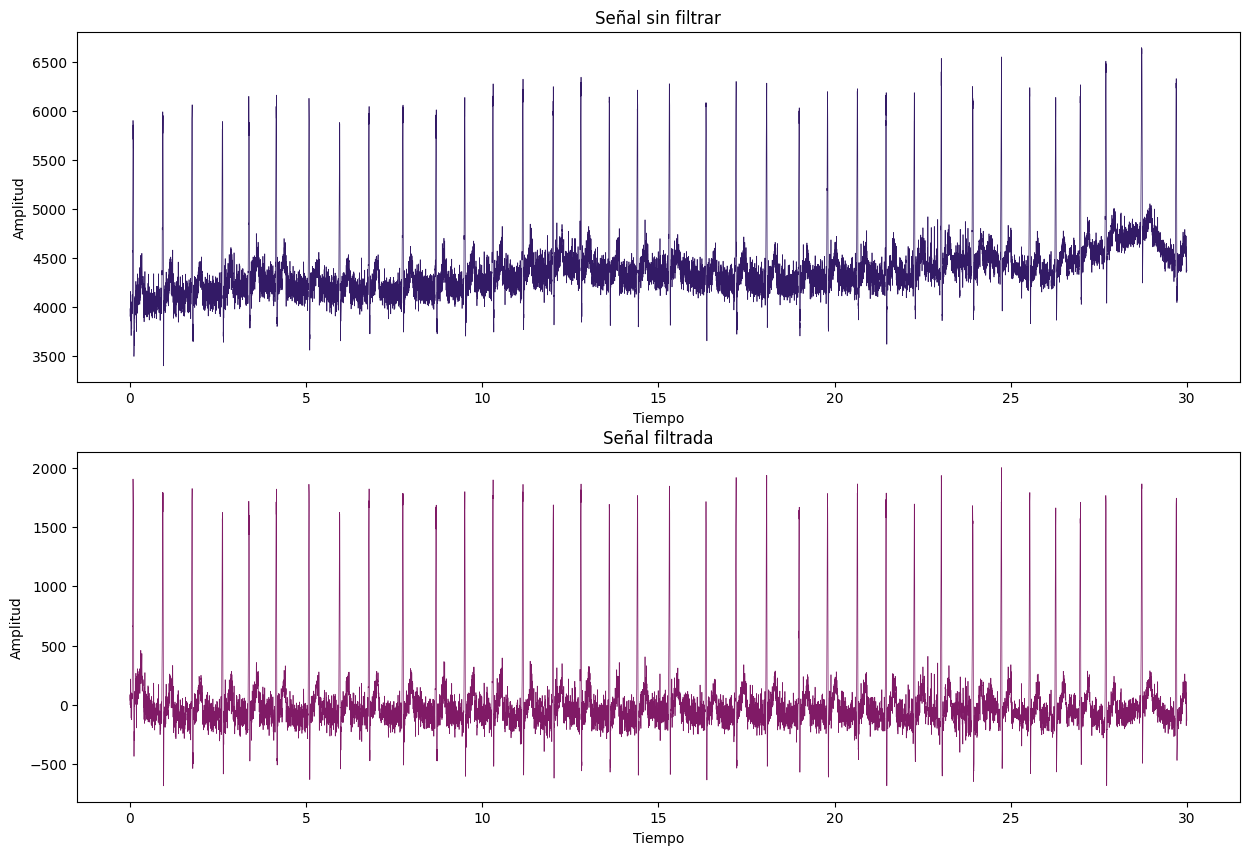

In [10]:
plt.figure(figsize=(15,10))

#Gráfica señal sin filtrar
#Se usa squeeze cuando queremos eliminar entradas unidimensionales de la forma de una matriz.
plt.subplot(2,1,1)
plt.plot(vector_tiempo,np.squeeze(ECG_recording),linewidth=0.5,color=(0.2,0.1,0.4))
plt.title('Señal sin filtrar')
plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('Amplitud', fontsize=10)

#Gráfica de la señal filtrada
plt.subplot(2,1,2)
plt.plot(vector_tiempo,np.squeeze(ECG_filtered),linewidth=0.5,color=(0.5,0.1,0.4))
plt.title('Señal filtrada')
plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('Amplitud', fontsize=10)

En las gráficas se observa que la amplitud de la señal filtrada se atenua. En el caso de la señal sin filtrar la amplitud varia entre 5000 y 3500 aproximadamente, para la señal filtrada la amplitud varia entre 500 y -500. A nivel temporal no se observa demasiada diferencia, a simple vista se observan los picos de la señal en los mismos intervalos de tiempo.

Considerando que las frecuencias de interés de la señal ECG van de de 0.5 a 150 Hz, el filtro que se utilizó fue un pasa altas con frecuencia de corte en 0.5 Hz y un pasa bajas con frecuencia de corte en 150 Hz.

3) Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

El valor promedio de la señal sin filtrar es 4131.136266878161
El valor RMS es 4142.4549578206015
El valor de la varianza es 93646.2220564969
La desviacion estandar es 306.01670225086883
El coeficiente Variación es 7.407567373276727


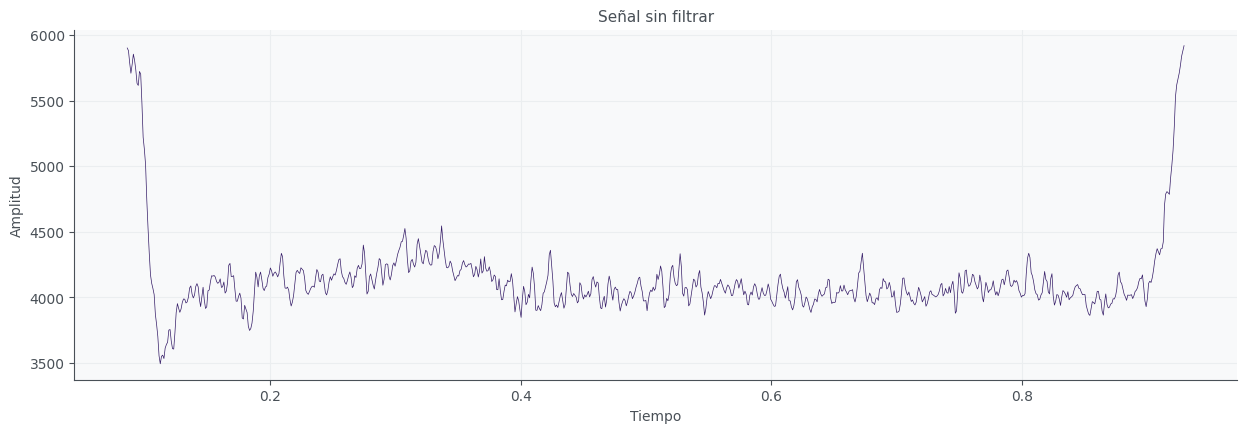

In [19]:
# Se usa la función biosppy para conocer la ubicación temporal de los picos de la señal ECG
a = ECG_recording.flatten() 
ecg = biosppy.signals.ecg.christov_segmenter(a)
rpeaks = ecg['rpeaks']
ecg

#Se convierte en array la tupla arrojada para posteriormente recorrer los datos.
A=np.asarray(ecg).flatten()

# Se seleccionan dos picos de la señal con los cuales se va a trabajar
Primer_pico=A[0]
Segun_pico=A[1]

# Gráfica de un ciclo cardiaco señal sin filtar

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(vector_tiempo[Primer_pico:Segun_pico],np.squeeze(ECG_recording)[Primer_pico:Segun_pico],linewidth=0.5,color=(0.2,0.1,0.4))
plt.title('Señal sin filtrar')
plt.xlabel('Tiempo', fontsize=10)
plt.ylabel('Amplitud', fontsize=10)

# Promedio 
p=np.squeeze(ECG_recording)[Primer_pico:Segun_pico]
prom_sinfiltrar=np.mean(p)
print('El valor promedio de la señal sin filtrar es',prom_sinfiltrar)

# Valor RMS
R=RMS(p)
print('El valor RMS es',R)

# Varianza
V=np.var(p)
print('El valor de la varianza es',V)

# Desviacion estandar
D=np.std(p)
print('La desviacion estandar es',D)

# Coeficiente Variación
C= (D/prom_sinfiltrar)*100
print('El coeficiente Variación es', C)

Para hacer un análisis de los datos obtenidos se calculó el coeficiente de variación. Se obtuvo un valor de 
7.4% lo que sugiere que la variabilidad de los datos es relativamente baja en comparación con su media. 

Respecto al valor RMS, el valor obtenido es cercano al promedio de los datos, lo que indica que los datos no tienen una gran variabilidad en su magnitud y tienden a estar concentrados cerca del valor medio. Por lo que se podría decir que posiblemente haya una baja dispersión de los datos en relación con su media.

4) Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

[   88   953  1807  2693  3454  4256  5203  6092  6950  7936  8902  9733
 10555 11424 12304 13111 13929 14755 15677 16743 17619 18509 19453 20273
 21147 21981 22798 23583 24493 25332 26155 26910 27628 28367 29406 30411]
El valor promedio de la señal filtrada es 75.99896884007573
El valor RMS es 325.2176360389243
El valor de la varianza es 99990.66752599123
La desviacion estandar es 316.21300973551234
El coeficiente Variación es 416.07539491873615


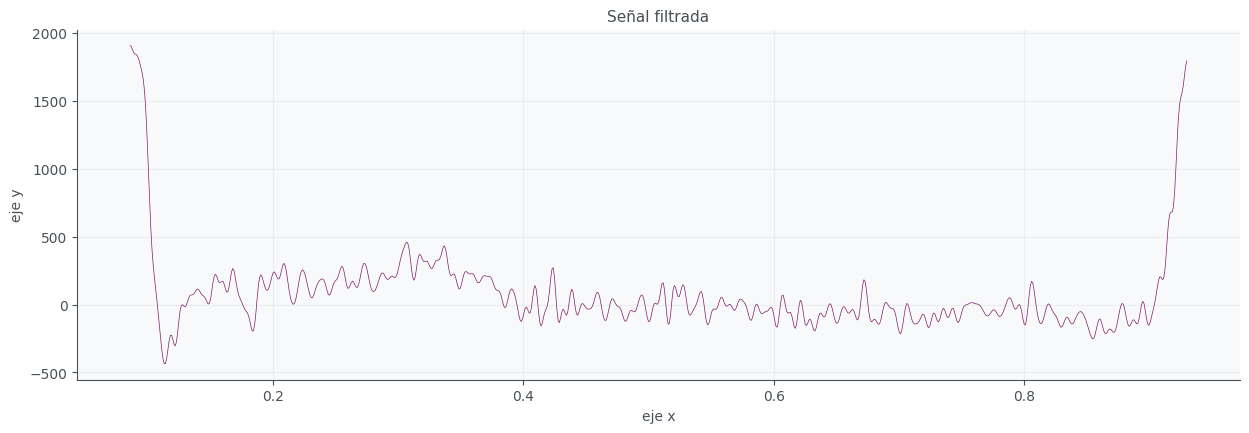

In [22]:
# Se usa la función biosppy para conocer la ubicación temporal de los picos de la señal ECG filtrada
b = ECG_filtered.flatten() 
ecgf = biosppy.signals.ecg.christov_segmenter(b)
rpeaks = ecgf['rpeaks']
ecgf

#Se convierte en array la tupla arrojada para posteriormente recorrer los datos.
B=np.asarray(ecg).flatten()
print(B)

# Gráfica de un ciclo cardiaco señal filtrada
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(vector_tiempo[Primer_pico:Segun_pico],np.squeeze(ECG_filtered)[Primer_pico:Segun_pico],linewidth=0.5,color=(0.5,0.1,0.4))
plt.title('Señal filtrada')
plt.xlabel('eje x', fontsize=10)
plt.ylabel('eje y', fontsize=10)

#Promedio 
p=np.squeeze(ECG_filtered)[Primer_pico:Segun_pico]
prom_filtrada=np.mean(p)
print('El valor promedio de la señal filtrada es',prom_filtrada)

#Valor RMS
R=RMS(p)
print('El valor RMS es',R)

#Varianza
V=np.var(p)
print('El valor de la varianza es',V)

#Desviacion estándar
D=np.std(p)
print('La desviacion estandar es',D)

# Coeficiente Variación
C= (D/prom_filtrada)*100
print('El coeficiente Variación es', C)

Al igual que en el caso anterior se calculó el coeficiente de variación. Se obtuvo un valor de 
416% lo que sugiere que la variabilidad de los datos es muy alta en comparación con su media. 

Respecto al valor RMS, el valor obtenido dista mucho del promedio de los datos, lo que indica que hay una alta dispersión de los datos en relación con su media.

Se puede decir que para la señal filtrada las medidas de variabilidad arrojan resultados opuestos con relación a la señal sin filtrar, por lo que se podría pensar que la mayoria de los datos con amplitud similar provenian de ruido. 

5) Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria

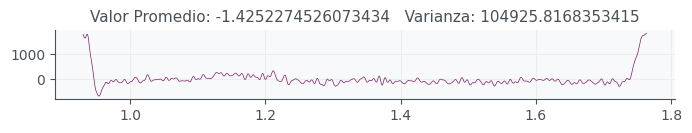

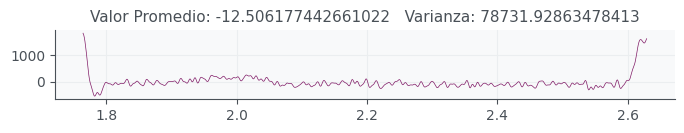

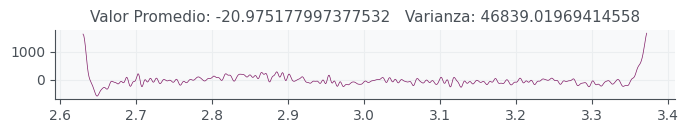

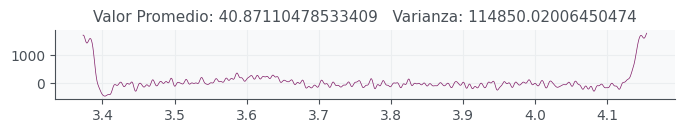

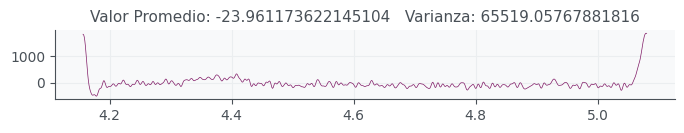

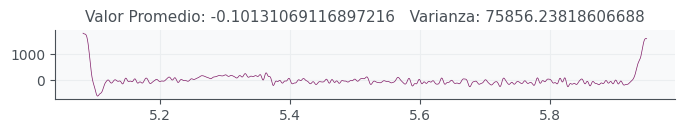

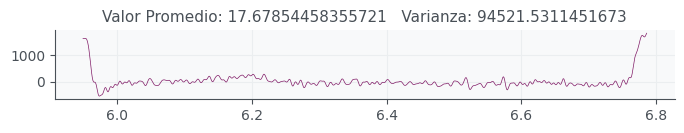

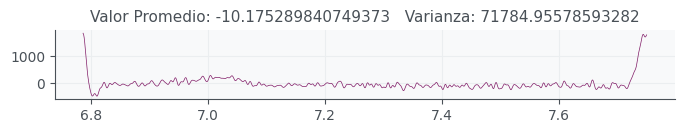

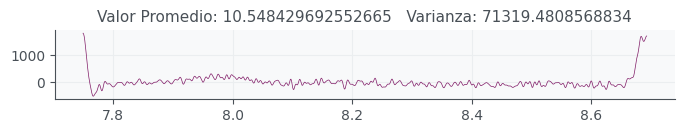

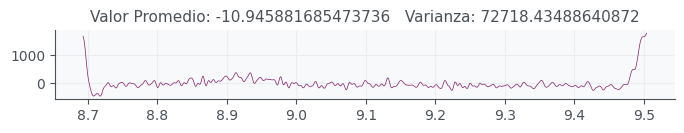

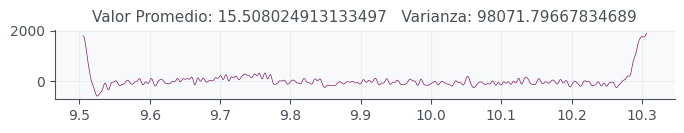

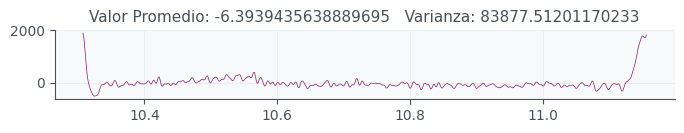

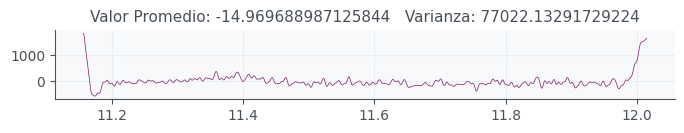

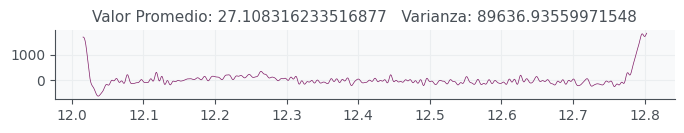

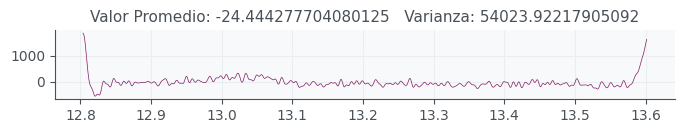

In [25]:
p=np.squeeze(ECG_filtered)
vv=np.squeeze(vector_tiempo)

for i in range(1,16):
  x=A[i]
  y=A[i+1]
  o=vv[x:y]
  oo=p[x:y]
  plt.figure(figsize=(8,16))
  plt.subplot(15,1,i)
  plt.plot(o,oo,linewidth=0.5,color=(0.5,0.1,0.4))
  plt.title("Valor Promedio: "+ str(np.mean(oo)) + "   Varianza: " + str(np.var(oo)))

Teniendo en cuenta que una señal se considera estacionaria si sus propiedades estadísticas no cambian con el tiempo, es posible afirmar que la señal en cuestion es no estacionaria ya que estadisticamente la varianza y el promedio cambian de manera significativa segun cada intervalo de datos que se tomen. Adicionalmente,graficamente se observa que la curva varia o se desplaza para cada intervalo de tiempo. 

6) Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney)

In [34]:
#Comparación 1
muestra11=p[(A[11]):((A[12]))]
muestra14=p[(A[14]):((A[15]))]

#Comparacion 2
muestra5=p[(A[5]):(A[6])]
muestra20=p[(A[20]):(A[21])]


# Prueba de NORMALIDAD , Kolmogorov-Smirnov
value11=stats.kstest(muestra11,"norm")
value14=stats.kstest(muestra14,"norm")

value5=stats.kstest(muestra5,"norm")
value20=stats.kstest(muestra20,"norm")

print("VALOR P, PRUEBAS DE NORMALIDAD")
print(f" P value muestra 11: {value11.pvalue}")
print(f" P value muestra 14: {value14.pvalue}")
print(f" P value muestra 5: {value5.pvalue}")
print(f" P value muestra 20: {value20.pvalue}")


# Prueba de HOMOCEDASTICIDAD, levene
value11l=stats.levene(muestra11,muestra14)
value5l=stats.levene(muestra5,muestra20)

print("VALOR P, PRUEBAS DE HOMOCEDASTICIDAD")
print(f" P value comparación 1: {value11l.pvalue}")
print(f" P value comparación 2: {value5l.pvalue}")


VALOR P, PRUEBAS DE NORMALIDAD
 P value muestra 11: 3.66e-322
 P value muestra 14: 4.17393257008303e-265
 P value muestra 5: 0.0
 P value muestra 20: 0.0
VALOR P, PRUEBAS DE HOMOCEDASTICIDAD
 P value comparación 1: 0.6905108548560248
 P value comparación 2: 0.09790661375662969


Teniendo en cuenta que no se cumple el supuesto de Normalidad ya que en cada caso el P value < 0.05, se procedió a hacer un análisis no paramétrico empleando la prueba de Mann-Whitney . 

se establece entonces
H0: La diferencia entre las medianas de los ciclos seleccionados no es estadisticamente significativa
H1: La diferencia entre las medianas de los ciclos seleccionados es estadisticamente significativa

In [36]:
# prueba Mann-Whitney 
value11m=stats.mannwhitneyu(muestra11,muestra14)
value5m=stats.mannwhitneyu(muestra5,muestra20)

print("VALOR P, PRUEBA Mann-Whitney ")
print(f" P value comparación 1: {value11m.pvalue}")
print(f" P value comparación 2: {value5m.pvalue}")

VALOR P, PRUEBA Mann-Whitney 
 P value comparación 1: 0.00314545829518423
 P value comparación 2: 9.454851657344944e-08


El P value obtenido en cada caso es menor al nivel de significancia establecido (0.05) por lo que la hipotesis nula se rechaza, es decir la diferencia entre las medianas de los ciclos seleccionados es estadisticamente significativa, lo que implica que las señales no son estacionarias.

7) Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)

In [43]:
result = adfuller(np.squeeze(p))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -26.612453
p-value: 0.000000


la prueba de establece :
H0: La serie temporal contiene una raíz unitaria, lo que indica que es no estacionaria. En otras palabras, la serie temporal tiene una raíz unitaria y no se puede considerar estacionaria.

Hipótesis alternativa H1: La serie temporal no contiene una raíz unitaria, lo que indica que es estacionaria. En otras palabras, la serie temporal no tiene una raíz unitaria y puede considerarse estacionaria.

Considerando el P value obtenido con la prueba Dickey-Fuller se tiene que la señal es estacionaria. Lo anterior no coindide con los resultados previos, donde se constantó a lo largo de varias pruebas que la señal era no estacionaria, adicionalmente, las señales de ECG son biológicos y estas no presentan un comportamiento estacionario. 